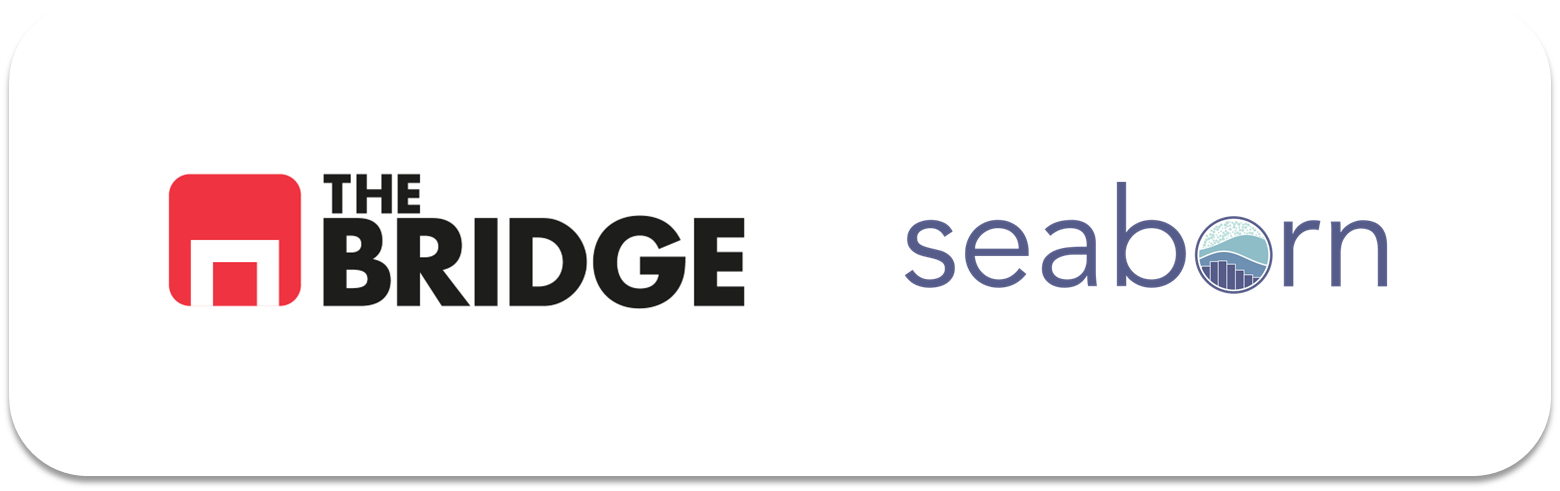

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [27]:
import pandas as pd

# Cargar el dataset
cities = pd.read_csv("./data/california_cities.csv")

# Ver el contenido (primeras filas y algo de info)
display(cities.head())
cities.info()

# Eliminar filas con valores nulos
cities = cities.dropna()

# Comprobar que ya no hay nulos
cities.info()


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 42

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [28]:

def disp_avanzado(df, col_x, col_y,
                  col_cat=None,        # 4ª: columna para el color (opcional)
                  size_arg=40,         # 5ª: tamaño fijo o nombre de columna
                  escala=1,            # 6ª: escala para el tamaño cuando es columna
                  modo_color="leyenda" # EXTRA: "leyenda" o "colorbar"
                 ):
    """
    df: DataFrame
    col_x, col_y: columnas numéricas para los ejes
    col_cat: columna (cat. o num.) para el color. Si es None no se pasa color.
    size_arg: valor numérico o nombre de columna para el tamaño de los puntos
    escala: factor por el que se multiplican los tamaños cuando size_arg es columna
    modo_color: "leyenda" → leyenda por colores y tamaños
                "colorbar" → colorbar para colores + leyenda para tamaños
    """

    # --- calcular tamaños ---
    if isinstance(size_arg, str):
        tamanos = df[size_arg] * escala
    else:
        tamanos = size_arg

    plt.figure(figsize=(8, 6))

    # --- dibujar el scatter ---
    if col_cat is None:
        # SIN columna categórica → NO pasamos color
        sc = plt.scatter(df[col_x], df[col_y], s=tamanos)
    else:
        # CON columna para color
        if modo_color == "colorbar":
            # Usamos códigos numéricos para poder poner colorbar
            codigos = df[col_cat].astype("category").cat.codes
            sc = plt.scatter(df[col_x], df[col_y], s=tamanos, c=codigos)
        else:  # "leyenda"
            sc = plt.scatter(df[col_x], df[col_y], s=tamanos, c=df[col_cat])

    plt.xlabel(col_x)
    plt.ylabel(col_y)

    # --- leyenda / colorbar ---
    if col_cat is not None:
        if modo_color == "colorbar":
            cbar = plt.colorbar(sc)
            cbar.set_label(col_cat)

        # Leyenda de tamaños (muy sencilla)
        import numpy as np
        tamanos_leg = np.linspace(np.min(tamanos), np.max(tamanos), 3)
        handles = [
            plt.scatter([], [], s=t, edgecolor="k")
            for t in tamanos_leg
        ]
        labels = [f"{t:.0f}" for t in tamanos_leg]
        plt.legend(handles, labels, title="tamaño", loc="upper right")

    plt.tight_layout()
    plt.show()



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

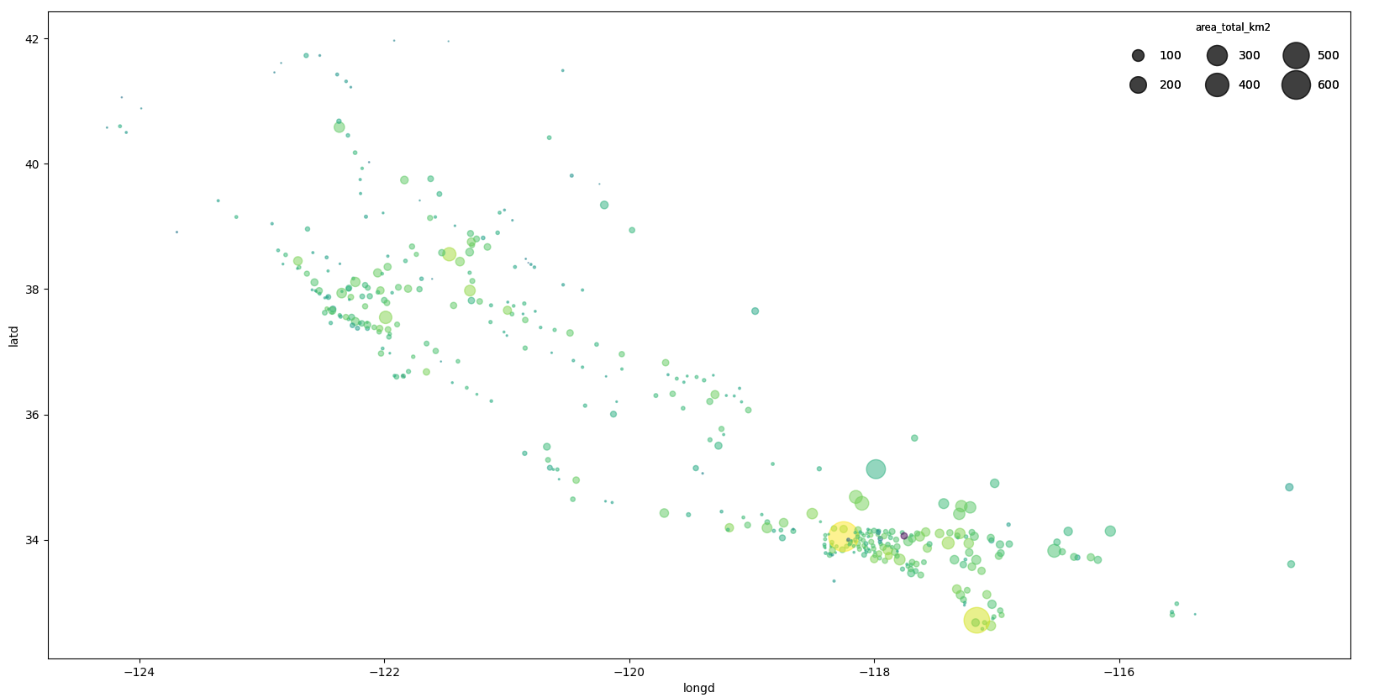

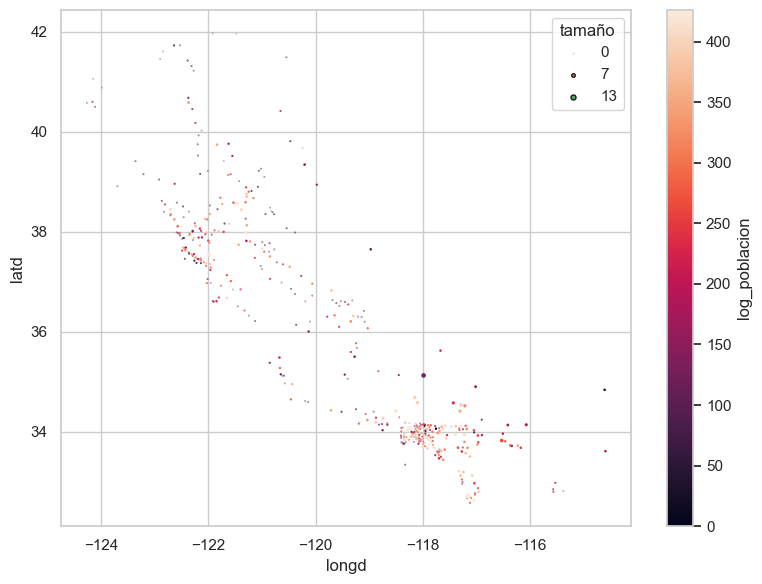

In [29]:
# Crear la columna de logaritmo decimal de la población
cities["log_poblacion"] = np.log10(cities["population_total"])

# Diagrama longitud (x) vs latitud (y)
disp_avanzado(
    df=cities,
    col_x="longd",
    col_y="latd",
    col_cat="log_poblacion",   # color según log de población
    size_arg="area_total_km2", # tamaño según área
    escala=1/100,              # ajusta la escala a tu gusto
    modo_color="colorbar"      # para que salga un colorbar
)


## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

In [30]:
# --------------------------------------------------
# 0. Imports
# --------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [31]:
# --------------------------------------------------
# 1. Carga y preparación de datos
# --------------------------------------------------
titanic = sns.load_dataset("titanic")

# Nos quedamos con columnas que vamos a usar
cols = ["survived", "sex", "age", "pclass", "embarked", "who"]
titanic = titanic[cols].copy()

# Crear variable niño/adulto (niños: <16 años)
titanic["es_nino"] = np.where(titanic["age"] < 16, "Niño/a", "Adulto/a")
titanic["es_nino"] = titanic["es_nino"].where(~titanic["age"].isna(), np.nan)

# Mapear pclass a nombres más legibles
titanic["pclass"] = titanic["pclass"].map({1: "1ª clase", 2: "2ª clase", 3: "3ª clase"})

# Mapeo de survived
titanic["superviviente"] = titanic["survived"].map({0: "Murió", 1: "Sobrevivió"})

titanic.head()


,survived,sex,age,pclass,embarked,who,es_nino,superviviente
0,0,male,22.0,3ª clase,S,man,Adulto/a,Murió
1,1,female,38.0,1ª clase,C,woman,Adulto/a,Sobrevivió
2,1,female,26.0,3ª clase,S,woman,Adulto/a,Sobrevivió
3,1,female,35.0,1ª clase,S,woman,Adulto/a,Sobrevivió
4,0,male,35.0,3ª clase,S,man,Adulto/a,Murió


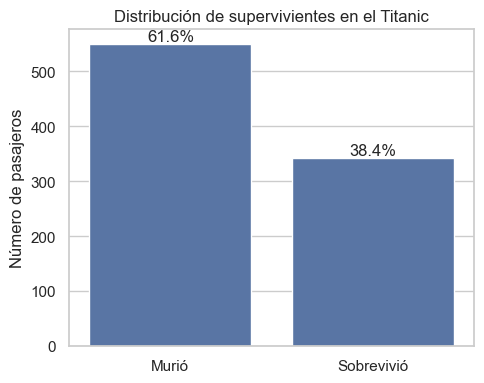

In [32]:
# --------------------------------------------------
# 2. Mortalidad global
# --------------------------------------------------
plt.figure(figsize=(5,4))
ax = sns.countplot(data=titanic, x="superviviente")
total = len(titanic)

for p in ax.patches:
    count = int(p.get_height())
    perc = 100 * count / total
    ax.annotate(f"{perc:.1f}%", 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.title("Distribución de supervivientes en el Titanic")
plt.xlabel("")
plt.ylabel("Número de pasajeros")
plt.tight_layout()
plt.savefig("fig1_mortalidad_global.png", dpi=150)
plt.show()


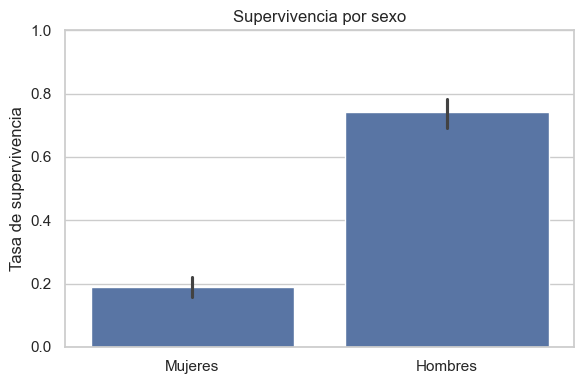

In [33]:
# --------------------------------------------------
# 3. Tasa de supervivencia por sexo
# --------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(
    data=titanic,
    x="sex",
    y="survived",
    estimator=np.mean
)
plt.xticks([0,1], ["Mujeres", "Hombres"])
plt.ylabel("Tasa de supervivencia")
plt.xlabel("")
plt.title("Supervivencia por sexo")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("fig2_supervivencia_sexo.png", dpi=150)
plt.show()


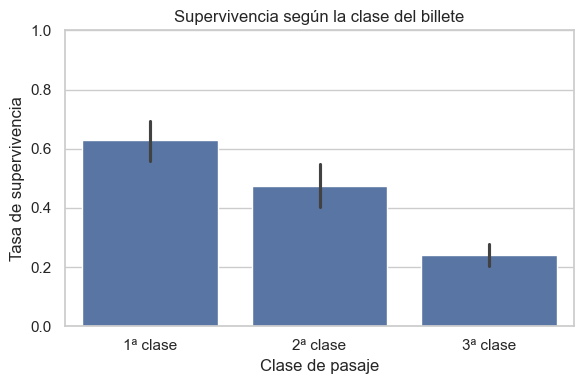

In [34]:
# --------------------------------------------------
# 4. Supervivencia por clase de pasajero
# --------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(
    data=titanic,
    x="pclass",
    y="survived",
    order=["1ª clase", "2ª clase", "3ª clase"],
    estimator=np.mean
)
plt.ylabel("Tasa de supervivencia")
plt.xlabel("Clase de pasaje")
plt.title("Supervivencia según la clase del billete")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("fig3_supervivencia_clase.png", dpi=150)
plt.show()


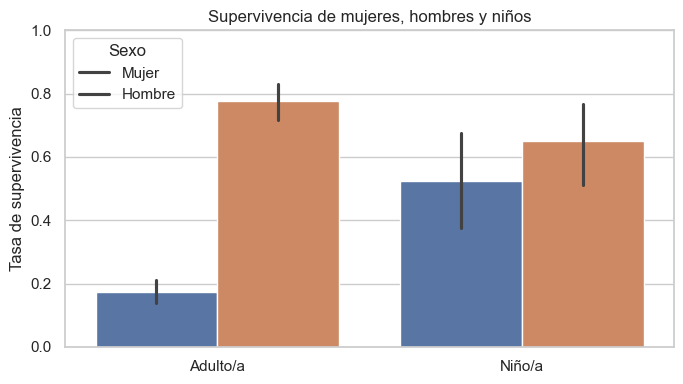

In [35]:
# --------------------------------------------------
# 5. Supervivencia por sexo y es_nino
# --------------------------------------------------
subset = titanic.dropna(subset=["es_nino"])

plt.figure(figsize=(7,4))
sns.barplot(
    data=subset,
    x="es_nino",
    y="survived",
    hue="sex",
    estimator=np.mean
)
plt.xlabel("")
plt.ylabel("Tasa de supervivencia")
plt.title("Supervivencia de mujeres, hombres y niños")
plt.ylim(0,1)
plt.legend(title="Sexo", labels=["Mujer", "Hombre"])
plt.tight_layout()
plt.savefig("fig4_supervivencia_ninos_y_sexo.png", dpi=150)
plt.show()


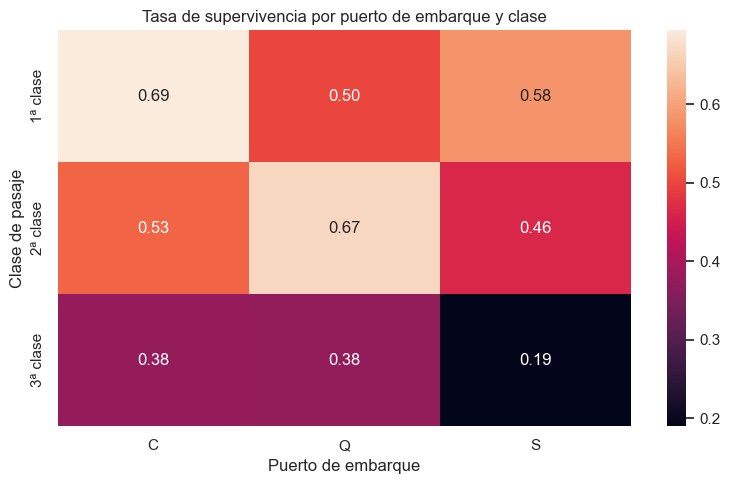

In [36]:
# --------------------------------------------------
# 6. Supervivencia por puerto y clase
# --------------------------------------------------
# Filtramos filas sin puerto
emb = titanic.dropna(subset=["embarked"])

plt.figure(figsize=(8,5))
tabla = (
    emb
    .groupby(["embarked", "pclass"])["survived"]
    .mean()
    .reset_index()
)

sns.heatmap(
    tabla.pivot(index="pclass", columns="embarked", values="survived"),
    annot=True, fmt=".2f"
)
plt.title("Tasa de supervivencia por puerto de embarque y clase")
plt.xlabel("Puerto de embarque")
plt.ylabel("Clase de pasaje")
plt.tight_layout()
plt.savefig("fig5_supervivencia_puerto_clase.png", dpi=150)
plt.show()


#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)